In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
data =pd.read_csv("/content/drive/MyDrive/dataset_ner_tsv/merged_file.tsv",sep = '\t')

In [ ]:
data

,text,label
0,COVID-19,S-Disease
1,COVID-19,S-Disease
2,COVID-19,S-Disease
3,malaria,S-Disease
4,HIV,S-Disease
...,...,...
113149,do,O
113150,Estado,O
113151,do,O
113152,Amazonas,O


In [ ]:
data.dropna(inplace=True)

In [ ]:
words=data['text']
labels=data['label']

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils import to_categorical

In [ ]:
# Convert text and labels to numerical vectors
MAX_NUM_WORDS = 10000
MAX_SEQUENCE_LENGTH = 20

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, lower=True, split=' ')
tokenizer.fit_on_texts(words)

X = tokenizer.texts_to_sequences(words)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
label2idx = {'O': 0, 'S-Disease': 1, 'B-Disease': 2, 'B-Organism': 3, 'I-Organism': 4,
             'S-Chemical_Substance': 5, 'S-Protien': 6, 'S-Organism': 7, 'B-Chemical_Substance': 8,
             'B-Protien': 9, 'I-Disease': 10, 'B-Medication': 11, 'S-Medication': 12,
             'S-Anatomical_Substances': 13, 'I-Protien': 14, 'B-Anatomical_Substances': 15,
             'I-Chemical_Substance': 16, 'I-Anatomical_Substances': 17, 'I-Medication': 18,
             'S-Gene': 19, 'E-Disease': 20, 'E-Protien': 21, 'E-Organism': 22, 'S_Anatomical_Substances': 23,
             'B-Gene': 24, 'E-Medication': 25, 'E-Anatomical_Substances': 26, 'E-Chemical_Substance': 27,
             'I-Gene': 28, 'E-Gene': 29}
y = [label2idx[label] for label in labels]
y = to_categorical(y)

In [ ]:
# Split the data into training, validation, and testing sets
VALIDATION_SPLIT = 0.2
TEST_SPLIT = 0.1
import numpy as np
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

num_validation_samples = int(VALIDATION_SPLIT * X.shape[0])
num_test_samples = int(TEST_SPLIT * X.shape[0])

In [ ]:
X_train = X[:-num_validation_samples - num_test_samples]
y_train = y[:-num_validation_samples - num_test_samples]
X_val = X[-num_validation_samples - num_test_samples:-num_test_samples]
y_val = y[-num_validation_samples - num_test_samples:-num_test_samples]
X_test = X[-num_test_samples:]
y_test = y[-num_test_samples:]

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# Define the LSTM network
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(30, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)

Epoch 1/10
2476/2476 [==============================] - 261s 104ms/step - loss: 0.3291 - accuracy: 0.9361 - val_loss: 0.2553 - val_accuracy: 0.9432
Epoch 2/10
2476/2476 [==============================] - 255s 103ms/step - loss: 0.2278 - accuracy: 0.9435 - val_loss: 0.2250 - val_accuracy: 0.9481
Epoch 3/10
2476/2476 [==============================] - 244s 99ms/step - loss: 0.1847 - accuracy: 0.9500 - val_loss: 0.2120 - val_accuracy: 0.9491
Epoch 4/10
2476/2476 [==============================] - 240s 97ms/step - loss: 0.1564 - accuracy: 0.9551 - val_loss: 0.2010 - val_accuracy: 0.9508
Epoch 5/10
2476/2476 [==============================] - 239s 96ms/step - loss: 0.1406 - accuracy: 0.9575 - val_loss: 0.1987 - val_accuracy: 0.9520
Epoch 6/10
2476/2476 [==============================] - 241s 97ms/step - loss: 0.1321 - accuracy: 0.9590 - val_loss: 0.1994 - val_accuracy: 0.9492
Epoch 7/10
2476/2476 [==============================] - 242s 98ms/step - loss: 0.1259 - accuracy: 0.9598 - val_loss:

In [ ]:
model.save('model.h5')

In [ ]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_' + metric])
    plt.show()

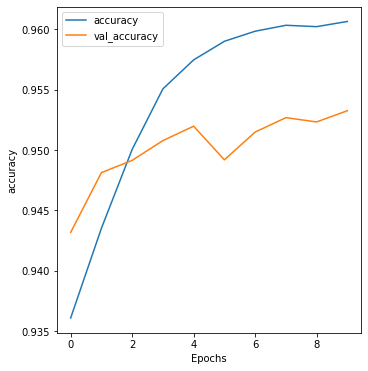

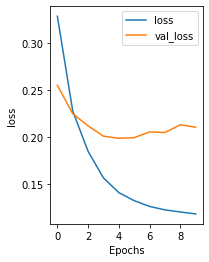

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [ ]:
# Tokenize and pad the new text
new="""RTS,S/AS01 (RTS,S) is the first and, to date, only vaccine that has demonstrated it can significantly reduce malaria in young children living in moderate-to-high malaria transmission areas. It acts against the Plasmodium falciparum parasite""" 
n=new.split()
new_text_vec = tokenizer.texts_to_sequences(n)
new_text_vec = pad_sequences(new_text_vec, maxlen=MAX_SEQUENCE_LENGTH)

In [ ]:
# Predict on the new data
predictions = model.predict(new_text_vec)

# Convert predictions to labels
predicted_labels = []
for pred in predictions:
    predicted_labels.append(list(label2idx.keys())[list(label2idx.values()).index(np.argmax(pred))])
print(n)    
print(predicted_labels)

2/2 [==============================] - 0s 13ms/step
['RTS,S/AS01', '(RTS,S)', 'is', 'the', 'first', 'and,', 'to', 'date,', 'only', 'vaccine', 'that', 'has', 'demonstrated', 'it', 'can', 'significantly', 'reduce', 'malaria', 'in', 'young', 'children', 'living', 'in', 'moderate-to-high', 'malaria', 'transmission', 'areas.', 'It', 'acts', 'against', 'the', 'Plasmodium', 'falciparum', 'parasite']
['S-Medication', 'E-Medication', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'S-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'S-Disease', 'O', 'O', 'O', 'O', 'O', 'O', 'B-Organism', 'I-Organism', 'O']


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Get the predicted labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoding to class labels
y_true = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Print the confusion matrix
#print('Confusion Matrix:')
#print(cm)

354/354 [==============================] - 5s 15ms/step


In [ ]:
# Create the classification report
cr = classification_report(y_true, y_pred_classes, zero_division=1)

# Print the classification report
print('Classification Report:')
print(cr)

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     10544
           1       0.44      0.86      0.59       106
           2       0.78      0.20      0.32       105
           3       0.71      0.50      0.59        98
           4       0.68      0.50      0.57        50
           5       0.53      0.37      0.44        43
           6       0.73      0.63      0.68        52
           7       0.44      0.10      0.16        42
           8       0.45      0.39      0.42        38
           9       0.69      0.31      0.43        29
          10       0.20      0.06      0.10        32
          11       0.62      0.24      0.34        21
          12       0.39      0.61      0.48        18
          13       0.33      0.23      0.27        13
          14       0.20      0.07      0.11        14
          15       0.38      0.20      0.26        15
          16       1.00      0.18      0.30        17
    

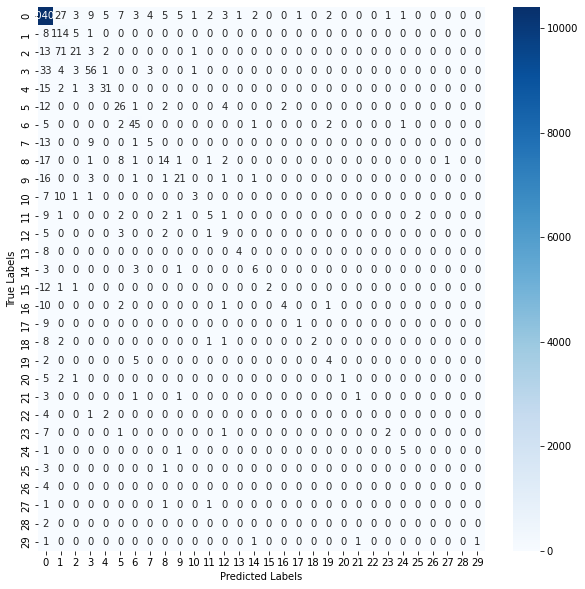

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=range(30), yticklabels=range(30))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()